In [76]:
import pandas as pd 
import matplotlib.pyplot as plt 

#load the dataset from my 'final_merged_data.csv'
covid_super_data = pd.read_csv('final_merged_data.csv') 

florida_data = covid_super_data[covid_super_data['State'] == 'FL'] 

florida_data.head()

,countyFIPS,County Name,State,StateFIPS_cases,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,2020-01-27_cases,...,2023-07-15_deaths,2023-07-16_deaths,2023-07-17_deaths,2023-07-18_deaths,2023-07-19_deaths,2023-07-20_deaths,2023-07-21_deaths,2023-07-22_deaths,2023-07-23_deaths,population
320,12001,Alachua County,FL,12,0,0,0,0,0,0,...,285,285,285,285,285,285,285,285,285,269043
321,12003,Baker County,FL,12,0,0,0,0,0,0,...,62,62,62,62,62,62,62,62,62,29210
322,12005,Bay County,FL,12,0,0,0,0,0,0,...,394,394,394,394,394,394,394,394,394,174705
323,12007,Bradford County,FL,12,0,0,0,0,0,0,...,58,58,58,58,58,58,58,58,58,28201
324,12009,Brevard County,FL,12,0,0,0,0,0,0,...,914,914,914,914,914,914,914,914,914,601942


Here, I will be generating weekly statistics(mean, median, mode) for the number of cases and deaths across Florida.

In [94]:
#start from 2020.06.01(Monday) to end date 2021.01.03(Sunday)
start_date = '2020-06-01' 
end_date = '2021_01_03' 

#get columns related to the cases
fl_cases = [col for col in florida_data.columns if '_cases' in col] 

#get columns related to the deaths
fl_deaths = [col for col in florida_data.columns if '_deaths' in col] 

#filter out only my chosen state: Florida cases. Then get relevant information such as County Name, State, Population
filtered_fl_cases= ['County Name', 'State', 'population'] + [col for col in fl_cases if start_date <= col.split('_')[0] <= end_date] 
filtered_fl_cases= florida_data[filtered_fl_cases] 

#filter out only my chosen state: Florida deaths. Then get relevant information such as County Name, State, and Population
filtered_fl_deaths= ['County Name', 'State', 'population'] + [col for col in fl_cases if start_date <= col.split('_')[0] <= end_date] 
filtered_fl_deaths= florida_data[filtered_fl_deaths]  

#use the melt function for better formatting to read the cases 
data_fl_cases = filtered_fl_cases.melt( 
    id_vars = ['County Name', 'State', 'population'], 
    var_name= 'date', 
    value_name = 'cases') 

#use the melt function for better formatting to read the deaths
data_fl_deaths = filtered_fl_deaths.melt( 
     id_vars = ['County Name', 'State', 'population'], 
    var_name= 'date', 
    value_name = 'deaths') 

#Convert 'date' column from a string to a datetime object 
data_fl_cases['date'] = pd.to_datetime(data_fl_cases['date'].str.split('_').str[0]) 
data_fl_deaths['date'] = pd.to_datetime(data_fl_deaths['date'].str.split('_').str[0]) 

#Group both cases and deaths by their 'State' and 'Date'
weekly_fl_cases = data_fl_cases.groupby(['State','date']).sum().reset_index()
weekly_fl_deaths = data_fl_deaths.groupby(['State','date']).sum().reset_index() 

#Resample both the cases and the deaths to get their prospective weekly sums
weekly_fl_cases = weekly_fl_cases.set_index('date').resample('W-MON').sum() 
weekly_fl_deaths = weekly_fl_deaths.set_index('date').resample('W-MON').sum()

#Start normalizing the weekly cases by the population, which we were given: (cases and deaths per 100,000 people)
weekly_fl_cases['per_100k'] = (weekly_fl_cases['cases'] / weekly_fl_cases['population']) * 100000
weekly_fl_deaths['per_100k'] = (weekly_fl_deaths['deaths'] / weekly_fl_deaths['population']) * 100000 

#calculate the mean, median, and mode for the weekly cases
weekly_mean_cases_fl = weekly_fl_cases['per_100k'].mean() 
weekly_median_cases_fl = weekly_fl_cases['per_100k'].median() 
weekly_mode_cases_fl = weekly_fl_cases['per_100k'].mode()[0] if not weekly_fl_cases['per_100k'].mode().empty else 0

#calculate the mean, median, and mode for the weekly deaths
weekly_mean_deaths_fl = weekly_fl_deaths['per_100k'].mean() 
weekly_median_deaths_fl = weekly_fl_deaths['per_100k'].median() 
weekly_mode_deaths_fl = weekly_fl_deaths['per_100k'].mode()[0] if not weekly_fl_cases['per_100k'].mode().empty else 0

print(f"Weekly mean of cases in Florida: {weekly_mean_cases_fl}") 
print(f"Weekly median of cases in Florida: {weekly_median_cases_fl}") 
print(f"Weekly mode of cases in Florida: {weekly_mode_cases_fl}") 
print() 

print(f"Weekly mean of deaths in Florida: {weekly_mean_deaths_fl}") 
print(f"Weekly median of deaths in Florida: {weekly_median_deaths_fl}")
print(f"Weekly mode of deaths in Florida: {weekly_mode_deaths_fl}")  
print()

print(weekly_fl_cases[['cases', 'per_100k']].head()) 
print(weekly_fl_deaths[['deaths', 'per_100k']].head())

Weekly mean of cases in Florida: 8855.858740237521
Weekly median of cases in Florida: 9216.211053467
Weekly mode of cases in Florida: 264.199156549873

Weekly mean of deaths in Florida: 8855.858740237521
Weekly median of deaths in Florida: 9216.211053467
Weekly mode of deaths in Florida: 264.199156549873

             cases    per_100k
date                          
2020-06-01   56744  264.199157
2020-06-08  428823  285.227576
2020-06-15  499161  332.012233
2020-06-22  628992  418.368099
2020-06-29  868434  577.630688
            deaths    per_100k
date                          
2020-06-01   56744  264.199157
2020-06-08  428823  285.227576
2020-06-15  499161  332.012233
2020-06-22  628992  418.368099
2020-06-29  868434  577.630688


Here we can see that I was able to generate the weekly statistics (mean, median, and mode) for my chosen state of Florida. By this, now we can draw conclusions that the weekly mean of cases in Florida was 8855.86, the weekly median of cases in Florida is 9216.21, and the weekly mode of cases in Florida is 264.20. 

We can also draw conclusions that the weekly mean of deaths in Florida is 8855.86, the weekly median of deaths in Florida is 8855.86, and the weekly mode of death in Florida is 8855.86. From the data, we can also draw conclusions that the mean, median and mode for the deaths seem to have been all the same.

Now, I will be comparing my data against the 5 other states that I chose. The states that I chose to compare is: Texas, Utah, Washington, Oregon, and Nevada. 

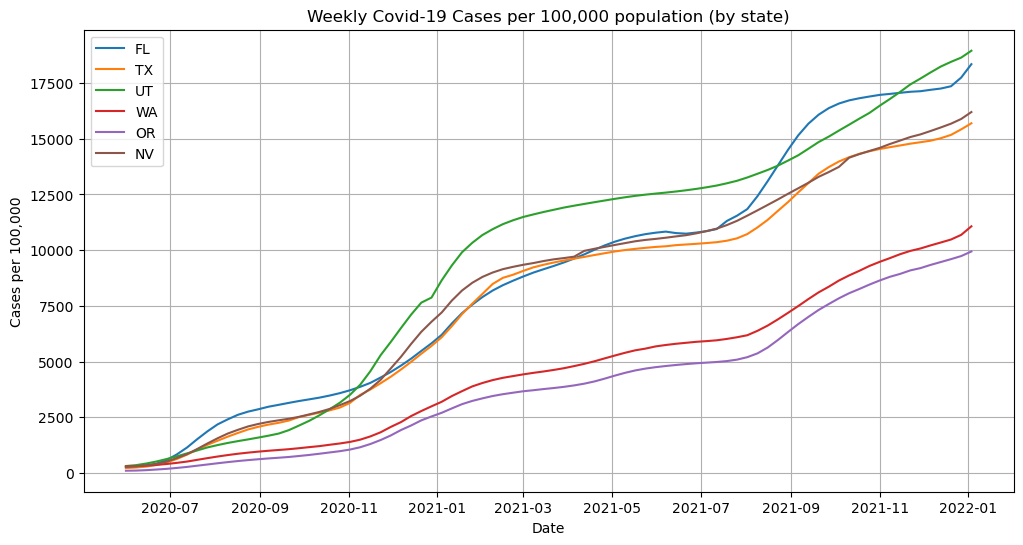

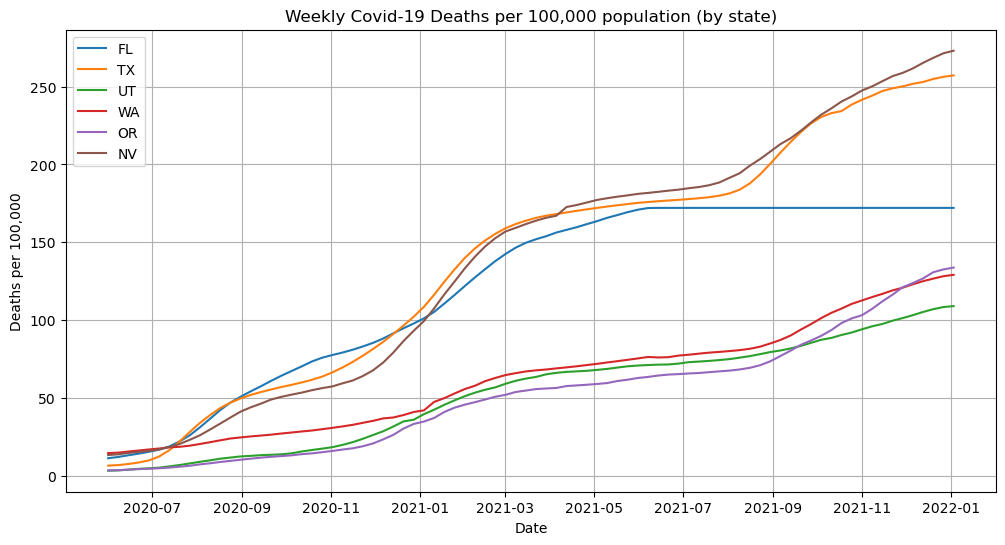

In [92]:
import pandas as pd 
import matplotlib.pyplot as plt 

states = ['FL', 'TX', 'UT', 'WA', 'OR', 'NV'] 

#start from 2020.06.01(Monday) to end date 2021.01.03(Sunday)
start_date = '2020-06-01' 
end_date = '2021_01_03' 

combined_weekly_cases = pd.DataFrame() 
combined_weekly_deaths = pd.DataFrame() 

for state in states:  
    #This will filter the data for the current state
    state_data = covid_super_data[covid_super_data['State'] == state] 

    #This will get the column names related to the Covid-19 cases and deaths
    state_cases = [col for col in state_data.columns if '_cases' in col] 
    state_deaths = [col for col in state_data.columns if '_deaths' in col] 

    #This will filter out the columns for both the cases and the deaths
    filtered_state_cases= ['County Name', 'State', 'population'] + [col for col in state_cases if start_date <= col.split('_')[0] <= end_date] 
    filtered_state_deaths= ['County Name', 'State', 'population'] + [col for col in state_deaths if start_date <= col.split('_')[0] <= end_date] 

    #Gets only the required columns for the cases and deaths
    filtered_state_cases= state_data[filtered_state_cases] 
    filtered_state_deaths= state_data[filtered_state_deaths]  

    #This will reshape the cases data by using the melt function
    data_state_cases = filtered_state_cases.melt(id_vars = ['County Name', 'State', 'population'], var_name= 'date', value_name = 'cases') 
    data_state_deaths = filtered_state_deaths.melt( id_vars = ['County Name', 'State', 'population'], var_name= 'date', value_name = 'deaths') 

    #This will convert the data from string format to datetime both cases and deaths
    data_state_cases['date'] = pd.to_datetime(data_state_cases['date'].str.split('_').str[0]) 
    data_state_deaths['date'] = pd.to_datetime(data_state_deaths['date'].str.split('_').str[0]) 

    #Will group the cases by their state and date, summing all the case and death values for each date
    weekly_state_cases = data_state_cases.groupby(['State','date']).sum().reset_index()
    weekly_state_deaths = data_state_deaths.groupby(['State','date']).sum().reset_index() 

    weekly_state_cases = weekly_state_cases.set_index('date').resample('W-MON').sum() 
    weekly_state_deaths = weekly_state_deaths.set_index('date').resample('W-MON').sum()

    #This will normalize the weekly case and death counts by the popoulation (per 100,000 people)
    weekly_state_cases['per_100k'] = (weekly_state_cases['cases'] / weekly_state_cases['population']) * 100000
    weekly_state_deaths['per_100k'] = (weekly_state_deaths['deaths'] / weekly_state_deaths['population']) * 100000 

    #add state column for filtering 
    weekly_state_cases ['State'] = state 
    weekly_state_deaths['State'] = state 

    combined_weekly_cases = pd.concat([combined_weekly_cases, weekly_state_cases]) 
    combined_weekly_deaths = pd.concat([combined_weekly_deaths, weekly_state_deaths])
 
#This figure will plot the weekly cases per 100,000 population for all chosen states: FL, TX, UT, WA, OR, NV
plt.figure(figsize=(12,6)) 

for state in states:  
    state_data = combined_weekly_cases[combined_weekly_cases['State'] == state] 
    plt.plot(state_data.index, state_data['per_100k'], label=state) 

plt.title('Weekly Covid-19 Cases per 100,000 population (by state)') 
plt.xlabel('Date') 
plt.ylabel('Cases per 100,000') 
plt.legend() 
plt.grid(True) 
plt.show() 


#This figure will plot the weekly deaths per 100,000 population for all chosen states: FL, TX, UT, WA, OR, NV
plt.figure(figsize=(12,6)) 
for state in states: 
    state_data = combined_weekly_deaths[combined_weekly_deaths['State'] == state] 
    plt.plot(state_data.index, state_data['per_100k'], label=state)

plt.title('Weekly Covid-19 Deaths per 100,000 population (by state)') 
plt.xlabel('Date') 
plt.ylabel('Deaths per 100,000') 
plt.legend() 
plt.grid(True) 
plt.show()



Here I will identify 5 counties within my state, Florida that had the highest cases and death rates. As I was able to to create, I was able to see a noticeable difference from during the time of 2020-09 and 2021-9. I noticed that around these times, there would be a significant increase in both cases and deaths and we can hypothesize that the reason that there is an increase would be because of seasonal effects.

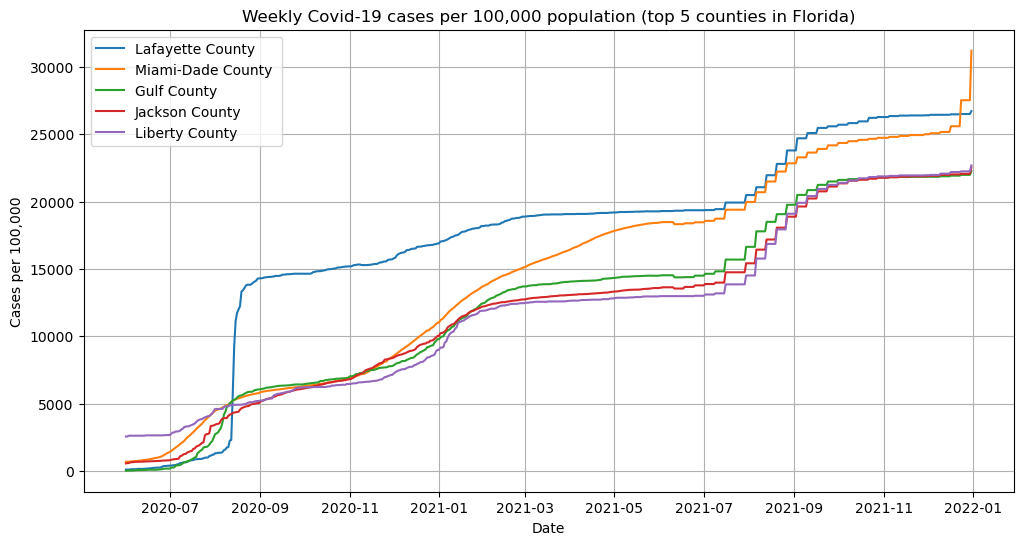

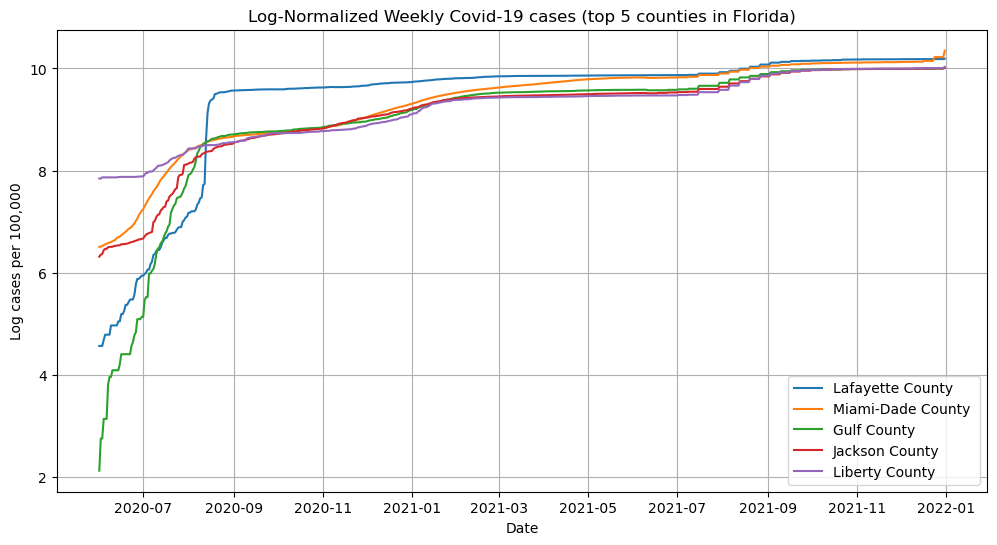

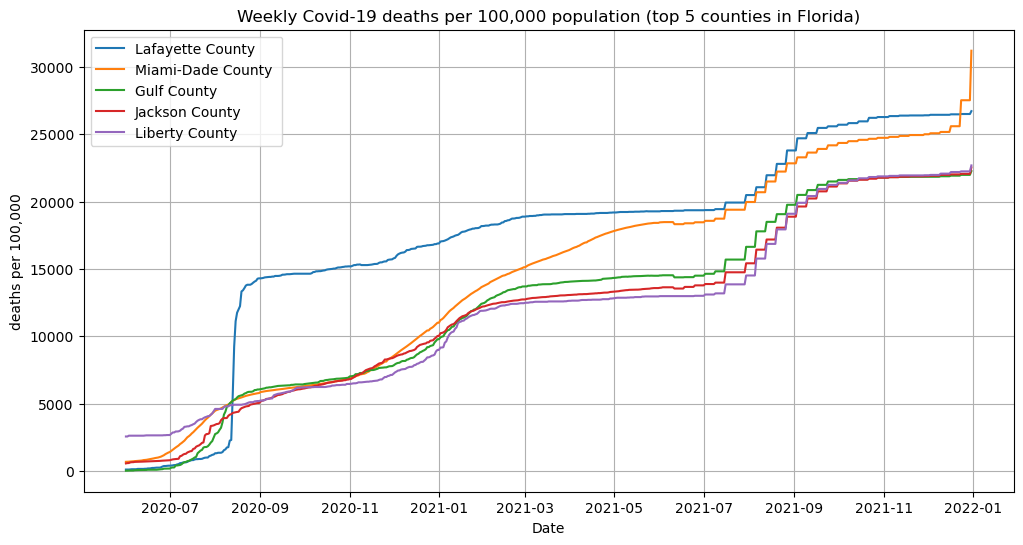

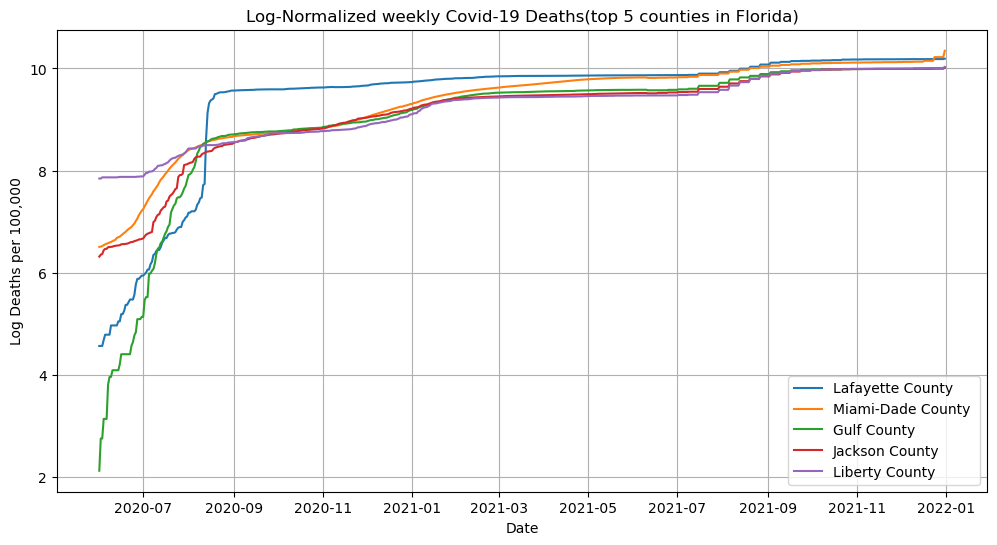

In [121]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

#start from 2020.06.01(Monday) to end date 2021.01.03(Sunday)
start_date = '2020-06-01' 
end_date = '2021_01_03' 

florida_data = covid_super_data[covid_super_data['State'] =='FL']

#get columns related to the cases
fl_cases = [col for col in florida_data.columns if '_cases' in col] 

#get columns related to the deaths
fl_deaths = [col for col in florida_data.columns if '_deaths' in col] 

#filter out only my chosen state: Florida cases. Then get relevant information such as County Name, State, Population
filtered_fl_cases= ['County Name', 'State', 'population'] + [col for col in fl_cases if start_date <= col.split('_')[0] <= end_date] 
filtered_fl_cases= florida_data[filtered_fl_cases] 

#filter out only my chosen state: Florida deaths. Then get relevant information such as County Name, State, and Population
filtered_fl_deaths= ['County Name', 'State', 'population'] + [col for col in fl_cases if start_date <= col.split('_')[0] <= end_date] 
filtered_fl_deaths= florida_data[filtered_fl_deaths]  

#use the melt function for better formatting to read the cases 
data_fl_cases = filtered_fl_cases.melt( id_vars = ['County Name', 'State', 'population'], var_name= 'date', value_name = 'cases') 

#use the melt function for better formatting to read the deaths
data_fl_deaths = filtered_fl_deaths.melt( id_vars = ['County Name', 'State', 'population'], var_name= 'date', value_name = 'deaths') 

#Convert 'date' column from a string to a datetime object 
data_fl_cases['date'] = pd.to_datetime(data_fl_cases['date'].str.split('_').str[0]) 
data_fl_deaths['date'] = pd.to_datetime(data_fl_deaths['date'].str.split('_').str[0]) 

#Group both cases and deaths by their 'State' and 'Date'
weekly_fl_cases = data_fl_cases.groupby(['County Name','date']).sum().reset_index()
weekly_fl_deaths = data_fl_deaths.groupby(['County Name','date']).sum().reset_index()  

#Start normalizing the weekly cases by the population, which we were given: (cases and deaths per 100,000 people)
weekly_fl_cases['per_100k'] = (weekly_fl_cases['cases'] / weekly_fl_cases['population']) * 100000
weekly_fl_deaths['per_100k'] = (weekly_fl_deaths['deaths'] / weekly_fl_deaths['population']) * 100000 

#This will group the weekly Florida cases data by 'county name', and get the top 5 counties
top_5_counties = weekly_fl_cases.groupby('County Name')['per_100k'].sum().nlargest(5).index.tolist() 

#filter the cases and deaths data to include only the top 5 counties
top_cases = weekly_fl_cases[weekly_fl_cases['County Name'].isin(top_5_counties)] 
top_deaths = weekly_fl_deaths[weekly_fl_deaths['County Name'].isin(top_5_counties)] 

#this will create a graph to demonstrate the weekly covid-19 cases per 100,000 population for the top 5 counties 
plt.figure(figsize=(12,6)) 
for county in top_5_counties: 
    county_data = top_cases[top_cases['County Name'] == county] 
    plt.plot(county_data['date'], county_data['per_100k'], label=county)

plt.title ('Weekly Covid-19 cases per 100,000 population (top 5 counties in Florida)') 
plt.xlabel('Date') 
plt.ylabel('Cases per 100,000') 
plt.legend() 
plt.grid(True) 
plt.show() 

#this will create a graph to demonstrate log-normalized weekly covid-19 cases for the top 5 counties
plt.figure(figsize=(12,6)) 
for county in top_5_counties: 
    county_data = top_cases[top_cases['County Name'] == county] 
    plt.plot(county_data['date'], np.log1p(county_data['per_100k']), label=county)

plt.title ('Log-Normalized Weekly Covid-19 cases (top 5 counties in Florida)') 
plt.xlabel('Date') 
plt.ylabel('Log cases per 100,000') 
plt.legend() 
plt.grid(True) 
plt.show()  

plt.figure(figsize=(12,6)) 
for county in top_5_counties: 
    county_data = top_deaths[top_deaths['County Name'] == county] 
    plt.plot(county_data['date'], county_data['per_100k'], label=county)

plt.title ('Weekly Covid-19 deaths per 100,000 population (top 5 counties in Florida)') 
plt.xlabel('Date') 
plt.ylabel('deaths per 100,000') 
plt.legend() 
plt.grid(True) 
plt.show()  

plt.figure(figsize=(12,6)) 
for county in top_5_counties: 
    county_data = top_deaths[top_deaths['County Name'] == county] 
    plt.plot(county_data['date'], np.log1p(county_data['per_100k']), label=county)

plt.title ('Log-Normalized weekly Covid-19 Deaths(top 5 counties in Florida)') 
plt.xlabel('Date') 
plt.ylabel('Log Deaths per 100,000') 
plt.legend() 
plt.grid(True) 
plt.show() 

Here I was able to compare the weekly statistics(mean, median, and mode) for number of cases and deaths across the US as well as the country that I chose to analyze, Germany. 

Some of the main reasons as to why there may have been peaks in both Covid-19 Cases and Deaths could be due to several factors. As I was doing research, a common theme was being said "season effects, public health policies, examining/testing availability, etc." 

Based on John Hopkins Bloomberg School of Public Health, they mentioned that "fall and winter are known as the time when respiratory viruses surge." Not only this, but COVID rates tend to also rise during the summer time due to "confluence of virological, behavioral, and environmental factors." Therefore, we can conclude that our environment had an impact in the Covid rates. This can also be demonstrated in some of the previous graphs within my jupyter notebook.  

Another factor could have been an individual's immunity. As the virus kept on becoming a more efficient transmissible variant, many individuals could have been affected by this change. Without updating on a yearly vaccination, this could have led to an increase in Covid-19 peaks. 

https://publichealth.jhu.edu/2024/why-covid-cases-rise-every-summer#:~:text=Hot%20weather%2C%20human%20behavior%20patterns,COVID's%20peak%20in%20the%20summer.&text=Fall%20and%20winter%20are%20known%20as%20the%20time%20when%20respiratory%20viruses%20surge. 

In [139]:
import pandas as pd 

covid_countries_data = pd.read_csv('owid-covid-data.csv') 

covid_countries_data['date'] = pd.to_datetime(covid_countries_data['date']) 

#filter data for both the US and Germany
us_data = covid_countries_data[covid_countries_data['location'] == 'United States'].copy()
germany_data = covid_countries_data[covid_countries_data['location'] == 'Germany'].copy()

start_date = '2020-06-01' 
end_date = '2021-01-3'

germany_data['date'] = pd.to_datetime(germany_data['date']) 

#Filter out both the data for US and Germany for my data range
us_filtered_data = us_data.loc[(us_data['date'] >= start_date) & (us_data['date'] <= end_date)].copy()
germany_filtered_data = germany_data.loc[(germany_data['date'] >= start_date) & (germany_data['date'] <= end_date)].copy()

#resample the filtered data for both US and Germany to get our weekly statistics
us_weekly_data = us_filtered_data.set_index('date').resample('W-MON').sum().reset_index() 
germany_weekly_data = germany_filtered_data.set_index('date').resample('W-MON').sum().reset_index() 

#calculating weekly statistics for covid-19 cases and deaths for both US and Germany
weekly_mean_cases_us = us_weekly_data['new_cases'].mean() 
weekly_median_cases_us = us_weekly_data['new_cases'].median() 
weekly_mode_cases_us = us_weekly_data['new_cases'].mode()[0] if not us_weekly_data['new_cases'].mode().empty else 0 

weekly_mean_deaths_us = us_weekly_data['new_deaths'].mean() 
weekly_median_deaths_us = us_weekly_data['new_deaths'].median() 
weekly_mode_deaths_us = us_weekly_data['new_deaths'].mode()[0] if not us_weekly_data['new_deaths'].mode().empty else 0

weekly_mean_cases_germany = germany_weekly_data['new_cases'].mean() 
weekly_median_cases_germany = germany_weekly_data['new_cases'].median() 
weekly_mode_cases_germany = germany_weekly_data['new_cases'].mode()[0] if not germany_weekly_data['new_cases'].mode().empty else 0 

weekly_mean_deaths_germany = germany_weekly_data['new_deaths'].mean() 
weekly_median_deaths_germany = germany_weekly_data['new_deaths'].median() 
weekly_mode_deaths_germany = germany_weekly_data['new_deaths'].mode()[0] if not germany_weekly_data['new_cases'].mode().empty else 0 

print("US Covid-19 Weekly Statistics:") 
print(f"Weekly Mean of Cases in the US: {weekly_mean_cases_us}") 
print(f"Weekly Median of Cases in the US: {weekly_median_cases_us}") 
print(f"Weekly Mode of Cases in the US: {weekly_mode_cases_us}") 
print(f"Weekly Mean of Deaths in the US: {weekly_mean_deaths_us}") 
print(f"Weekly Median of Deaths in the US: {weekly_median_deaths_us}") 
print(f"Weekly Mode of Deaths in the US: {weekly_mode_deaths_us}")
print() 

print("Germany Covid-19 Weekly Statistics:") 
print(f"Weekly Mean of Cases in Germany: {weekly_mean_cases_germany}") 
print(f"Weekly Median of Cases in Germany: {weekly_median_cases_germany}") 
print(f"Weekly Mode of Cases in Germany: {weekly_mode_cases_germany}") 
print(f"Weekly Mean of Deaths in Germany: {weekly_mean_deaths_germany}") 
print(f"Weekly Median of Deaths in Germany: {weekly_median_deaths_germany}") 
print(f"Weekly Mode of Deaths in Germany: {weekly_mode_deaths_germany}") 

US Covid-19 Weekly Statistics:
Weekly Mean of Cases in the US: 577688.09375
Weekly Median of Cases in the US: 381771.5
Weekly Mode of Cases in the US: 0.0
Weekly Mean of Deaths in the US: 8038.90625
Weekly Median of Deaths in the US: 6219.5
Weekly Mode of Deaths in the US: 0.0

Germany Covid-19 Weekly Statistics:
Weekly Mean of Cases in Germany: 50032.78125
Weekly Median of Cases in Germany: 11035.0
Weekly Mode of Cases in Germany: 0.0
Weekly Mean of Deaths in Germany: 1363.03125
Weekly Median of Deaths in Germany: 75.0
Weekly Mode of Deaths in Germany: 31.0
